In [450]:
import time
import random
import matplotlib.pyplot as plt
import pandas as pd

In [451]:
def bubbleSort(a):
    n = len(a)
    for i in range(n):
        for j in range(0, n-i-1):
            if a[j] > a[j+1]:
                a[j], a[j+1] = a[j+1], a[j]

In [452]:
def insertionSort(a):
    for i in range(1, len(a)):
        k = a[i]
        j = i - 1
        while j >= 0 and k < a[j]:
            a[j + 1] = a[j]
            j -= 1
        a[j + 1] = k

In [453]:
def selectionSort(a):
    for i in range(len(a)):
        min = i
        for j in range(i+1, len(a)):
            if a[j] < a[min]:
                min = j
        a[i], a[min] = a[min], a[i]

In [454]:
def mergeSort(a):
    if len(a) > 1:
        mid = len(a) // 2
        lh = a[:mid]
        rh = a[mid:]
        mergeSort(lh)
        mergeSort(rh)
        i = j = k = 0
        while i < len(lh) and j < len(rh):
            if lh[i] < rh[j]:
                a[k] = lh[i]
                i += 1
            else:
                a[k] = rh[j]
                j += 1
            k += 1
        while i < len(lh):
            a[k] = lh[i]
            i += 1
            k += 1
        while j < len(rh):
            a[k] = rh[j]
            j += 1
            k += 1

In [455]:
def quickSort(a):
    if len(a) <= 1:
        return a
    else:
        p = a.pop()
        lp = []
        gp = []
        for ele in a:
            if ele <= p:
                lp.append(ele)
            else:
                gp.append(ele)
        return quickSort(lp) + [p] + quickSort(gp)

In [456]:
def RandArr(s):
    return [random.randint(1,9999) for i in range(s)]

In [457]:
def execTime(sortF, ipData):
    startTime = time.time()
    sortF(ipData.copy())
    endTime = time.time()
    return endTime - startTime

In [458]:
arrayLen = []
for i in range(100, 2100, 100):
    arrayLen.append(i)

In [459]:
sortF = {
    'BubbleSort': bubbleSort,
    'InsertionSort': insertionSort,
    'MergeSort': mergeSort,
    'SelectionSort': selectionSort,
    'QuickSort': quickSort
}

In [460]:
exec_Times = {alg: [] for alg in sortF.keys()}
for i in arrayLen:
    ipData = RandArr(i)
    for alg, sf in sortF.items():
        exec_Time = execTime(sf, ipData)
        exec_Times[alg].append(exec_Time)

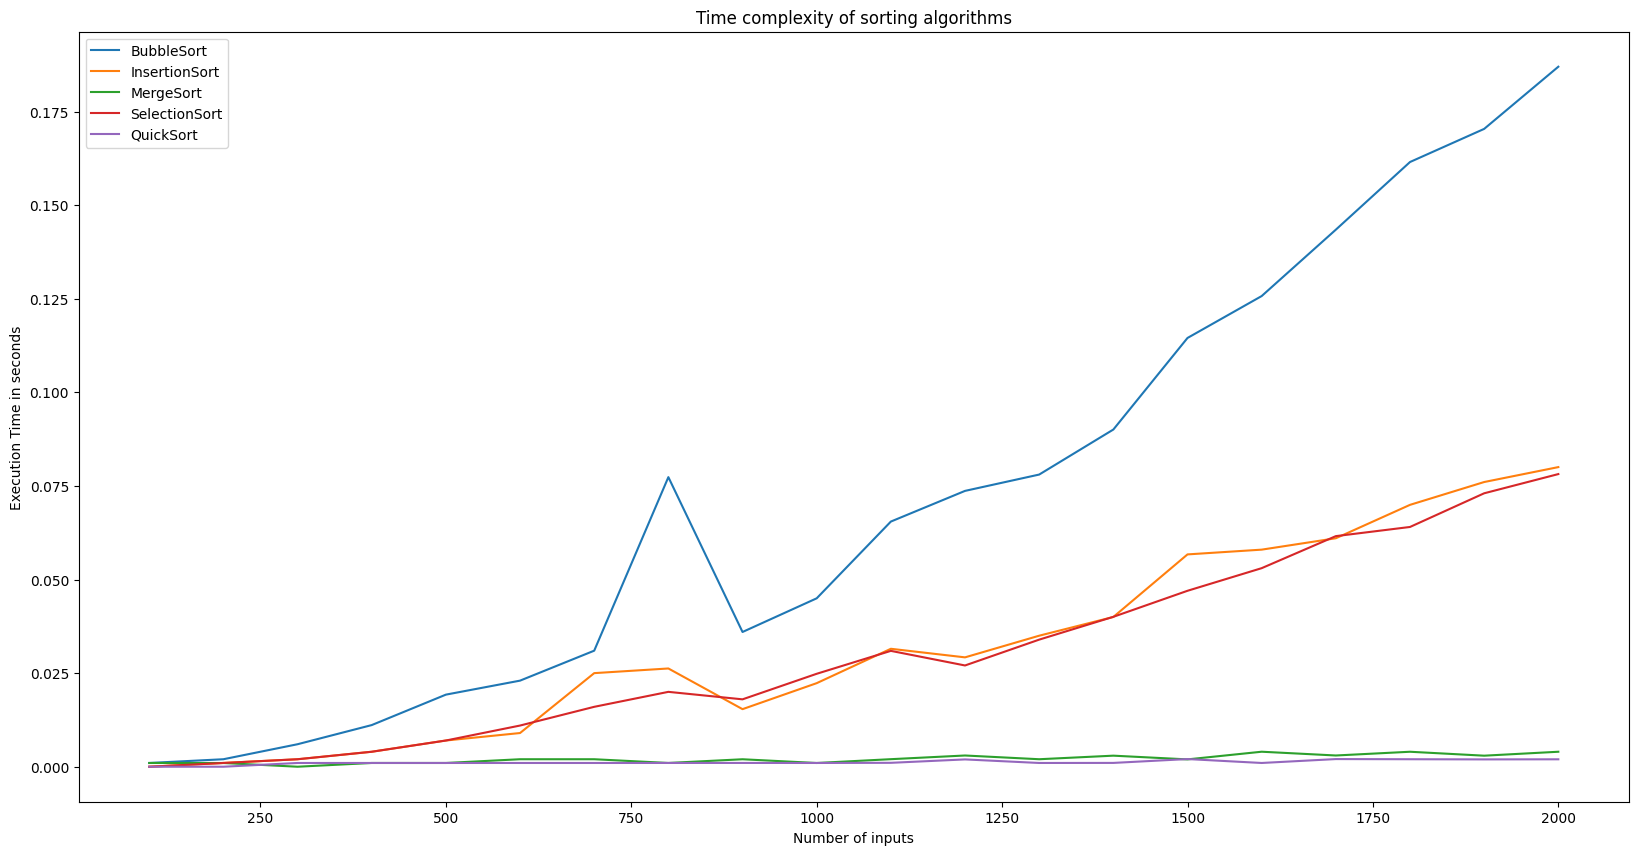

<Figure size 640x480 with 0 Axes>

In [461]:
plt.figure(figsize=(20, 10))
for alg, t in exec_Times.items():
    plt.plot(arrayLen, t, label=alg)
plt.title('Time complexity of sorting algorithms')
plt.xlabel('Number of inputs')
plt.ylabel('Execution Time in seconds')
plt.legend()
plt.show()
plt.tight_layout();

In [462]:
def _round(a):
    c = -1
    for i in range(len(a)):
        a[i] = round(a[i],4)
    return a[::-1]

In [463]:
df = pd.DataFrame()
times = []
for a in exec_Times.keys():
    tdf = pd.DataFrame([[a,_round(exec_Times[a])]],columns=['Sorting Algorithm used','Execution time'])
    df = pd.concat([df,tdf])

In [464]:
df

,Sorting Algorithm used,Execution time
0,BubbleSort,"[0.187, 0.1704, 0.1615, 0.1435, 0.1257, 0.1145..."
0,InsertionSort,"[0.08, 0.0761, 0.07, 0.061, 0.058, 0.0567, 0.0..."
0,MergeSort,"[0.004, 0.0029, 0.004, 0.003, 0.004, 0.002, 0...."
0,SelectionSort,"[0.0782, 0.073, 0.064, 0.0616, 0.053, 0.047, 0..."
0,QuickSort,"[0.002, 0.002, 0.002, 0.002, 0.001, 0.002, 0.0..."
